# import library

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# load data


In [4]:
data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# data processing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


<Axes: >

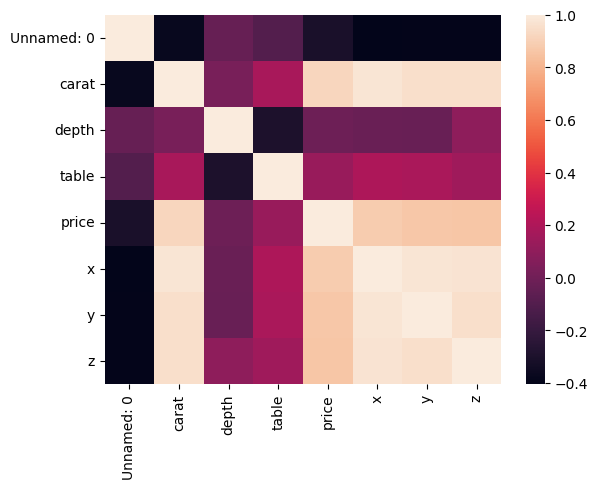

In [7]:
sns.heatmap(data.corr(numeric_only=True))

# The first column seems to be just index

In [10]:
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)


KeyError: "['Unnamed: 0'] not found in axis"

In [12]:
data.shape

(53920, 10)

In [11]:
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Dropping the outliners

In [13]:
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

In [16]:
data_numeric = data.select_dtypes(include='number')
data_numeric.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


# Get list of categorical variables

In [20]:
categorical_features = ['cut', 'color', 'clarity']
numerical_features = ['carat', 'depth', 'table']

In [23]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


# Make copy to avoid changing original data

In [26]:
label_data = data.copy()


# Apply label encoder to each column with categorical data

In [27]:
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [28]:
data.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


In [30]:
label_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53907 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53907 non-null  float64
 1   cut      53907 non-null  int64  
 2   color    53907 non-null  int64  
 3   clarity  53907 non-null  int64  
 4   depth    53907 non-null  float64
 5   table    53907 non-null  float64
 6   price    53907 non-null  int64  
 7   x        53907 non-null  float64
 8   y        53907 non-null  float64
 9   z        53907 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.5 MB


# correlation matrix

<Axes: >

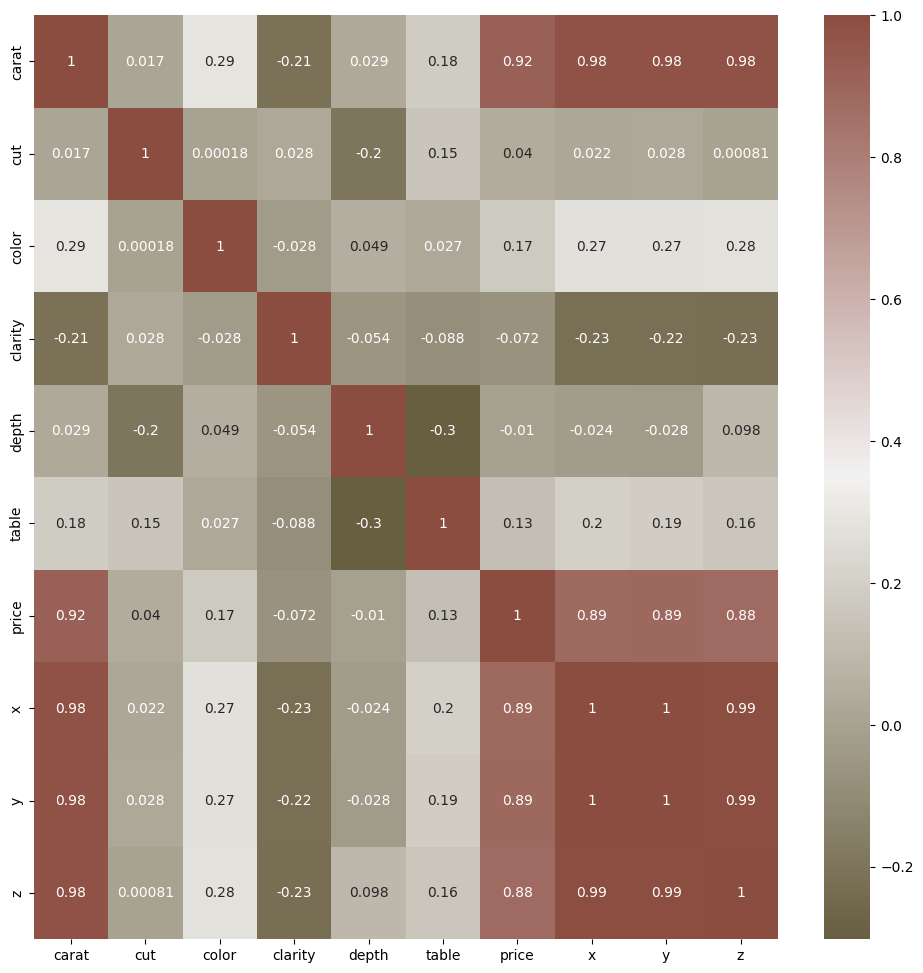

In [31]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )



# Assigning the featurs as X and trarget as y

In [35]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)
X


,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


# building model 

In [36]:
Pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                      ("lr_classifier",LinearRegression)])
Pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                      ("dt_classifier",DecisionTreeRegressor)])
Pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                      ("rf_classifier",RandomForestRegressor)])
Pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                      ("rf_classifier",KNeighborsRegressor)])
Pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                      ("rf_classifier",XGBRegressor)])

In [37]:
pipeline= [Pipeline_lr, Pipeline_dt, Pipeline_rf, Pipeline_kn, Pipeline_xgb]

In [38]:
pipe_dict={0: "LinearRegression", 1: "decisionTree", 2:"RandomForestRegressor", 3:"KNeighborsRegressor", 4: "XGBRegressor"}

In [52]:
# for pipe in pipeline:
#     pipe.fit(X_train,y_train)

In [48]:
lr=LinearRegression()
model=lr.fit(X_test,y_test)
model.score(X_test,y_test)

0.8892056312042892

# Model prediction on test data



In [46]:
pred = lr.predict(X_test)
pred

array([6135.48634665, 3544.99378073, 4238.21287934, ...,   20.35412811,
       1493.88585224, 6843.17525163])

In [49]:
#carat=0.23, cut=2, color=1 claritty=3 depth=61.5, table=55, x=3.95, y=3.98, z=2.43
model.predict([[0.23,2,1,3,61.5,55,3.95,3.98,2.43]])

c:\Program Files\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([294.28961425])

# akurasi

In [50]:
score =lr.score(X_test, y_test)
print('akurasi model regresi linier = ',score)


akurasi model regresi linier =  0.8892056312042892


# save model

In [51]:
import pickle
filename = 'berlian.sav'
pickle.dump(lr,open(filename,'wb'))